In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("emails.csv")  
print("Dataset Loaded Successfully")
print(df.head())
print(df.info())

Dataset Loaded Successfully
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
<class 'pandas.core.frame.DataFram

In [3]:
if 'Email No.' in df.columns:
    df = df.drop('Email No.', axis=1)

X = df.drop('Prediction', axis=1)
y = df['Prediction']

print("\nData Prepared Successfully")
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Data Prepared Successfully
Features shape: (5172, 3000)
Target shape: (5172,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nData Split Done")



Data Split Done


In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [6]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [7]:
print("\n📊 Model Evaluation Results 📊")

print("\n🔹 K-Nearest Neighbors Results:")
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", round(acc_knn, 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

print("\n🔹 Support Vector Machine Results:")
acc_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", round(acc_svm, 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


📊 Model Evaluation Results 📊

🔹 K-Nearest Neighbors Results:
Accuracy: 0.863
Confusion Matrix:
 [[645  94]
 [ 48 248]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.84      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.87      0.86      0.87      1035


🔹 Support Vector Machine Results:
Accuracy: 0.959
Confusion Matrix:
 [[715  24]
 [ 18 278]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



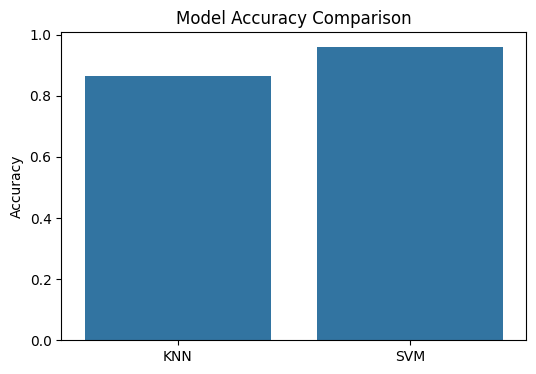

In [8]:
models = ['KNN', 'SVM']
accuracy = [acc_knn, acc_svm]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracy)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()